In [ ]:
!pip install ruwordnet
!ruwordnet download
!pip install textract
from ruwordnet import RuWordNet
!pip uninstall spacy -y
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')
nlp.max_length = 10000000

In [ ]:
!pip install pytextrank

In [ ]:
# саммри по документу

import spacy
import pytextrank
import os
from spacy.tokenizer import Tokenizer
# nlp.add_pipe("textrank")

for root, dirs, files in os.walk("/content/drive/MyDrive/Thesis/data/texts"):
    for filename in files:
      path = f'/content/drive/MyDrive/Thesis/data/texts/{filename}'
      text = open(path, encoding='utf-8').read()
      text_len = len(text)
      doc = nlp(text)
      tr = doc._.textrank
      summary = []
      for sent in tr.summary():
        summary.append(sent)
      doc_sum = nlp(str(summary))
      summary_len = len([t.text for t in doc_sum])
      print(f"========================= {filename} =======================================")
      print("SUMMARY LEN", summary_len)
      print("TEXT LEN", text_len)

      ratio = summary_len / text_len
      print(ratio)
      print(summary)

Spearman correlation coefficient: -0.6625791817006554
P-value: 9.003190004771488e-05


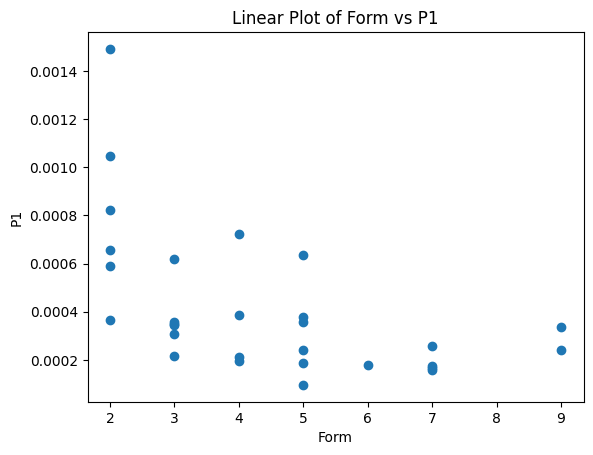

In [23]:
import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

form = [2,3,3,3,3,4,6,7,5,9,2,5,5,5,3,4,2,7,2,2,2,7,7,9,5,5,4,3,4]
all_ratios = [0.000591, 0.000619, 0.000216, 0.000344, 0.000351, 0.000723, 0.000178, 0.000175, 0.000356, 0.000241, 0.000823, 9.6e-05, 0.000637, 0.000376, 0.000358, 0.000213, 0.001048, 0.000165, 0.000658, 0.001491, 0.000367, 0.000159, 0.000256, 0.000336,
              0.000186, 0.000239, 0.000195, 0.000309, 0.000387]

# Calculate correlation
corr, p_value = spearmanr(all_ratios, form)
print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

plt.plot(form, all_ratios, 'o')
plt.xlabel('Form')
plt.ylabel('P1')
plt.title('Linear Plot of Form vs P1')
plt.show()